In [1]:
pip install pandas numpy matplotlib statsmodels scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

# Create a date range starting from January 1, 2020, for 100 days
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Generate a sample time series with a trend and seasonality
np.random.seed(42)
data = np.sin(np.linspace(0, 3*np.pi, 100)) + np.linspace(0, 1, 100) + np.random.normal(0, 0.2, 100)

# Create a DataFrame with the date as index
df = pd.DataFrame({'date': dates, 'value': data})
df.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
print(df.head())


               value
date                
2020-01-01  0.099343
2020-01-02  0.077504
2020-01-03  0.338991
2020-01-04  0.616642
2020-01-05  0.365236


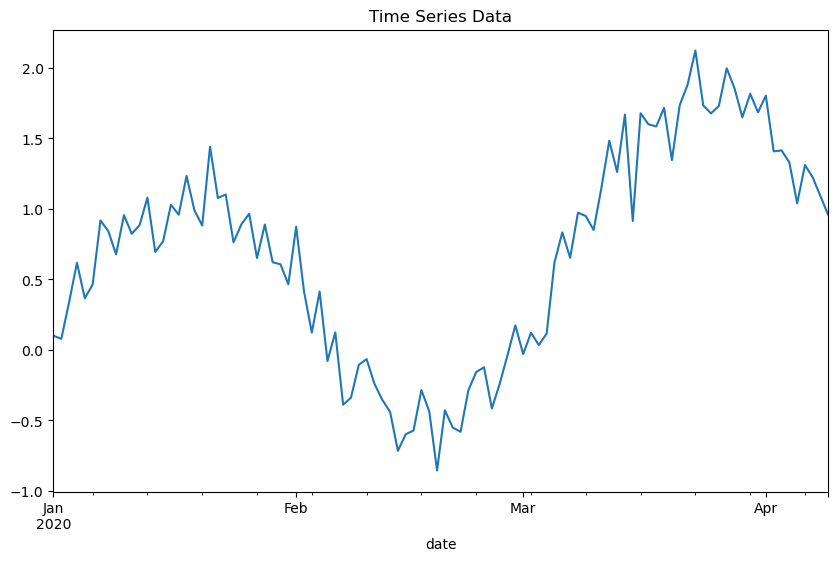

In [3]:
import matplotlib.pyplot as plt

# Plot the time series data
df['value'].plot(figsize=(10, 6), title='Time Series Data')
plt.show()


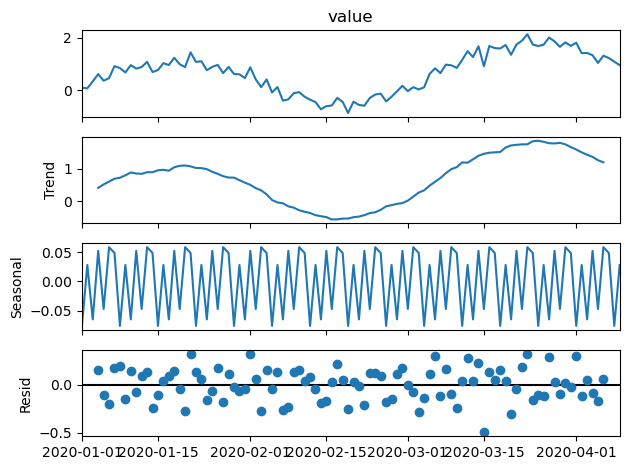

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['value'], model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with order (p, d, q)
model = ARIMA(df['value'], order=(5, 1, 0))

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood                   3.999
Date:                Mon, 12 Aug 2024   AIC                              4.002
Time:                        20:13:41   BIC                             19.573
Sample:                    01-01-2020   HQIC                            10.302
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4436      0.100     -4.458      0.000      -0.639      -0.249
ar.L2         -0.1433      0.122     -1.173      0.241      -0.383       0.096
ar.L3          0.0603      0.102      0.591      0.5

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [6]:
# Forecast the next 10 data points
forecast = model_fit.forecast(steps=10)

# Print the forecasted values
print(forecast)


2020-04-10    0.973266
2020-04-11    1.043495
2020-04-12    0.960157
2020-04-13    0.934025
2020-04-14    0.925747
2020-04-15    0.942004
2020-04-16    0.945133
2020-04-17    0.913875
2020-04-18    0.919783
2020-04-19    0.921301
Freq: D, Name: predicted_mean, dtype: float64


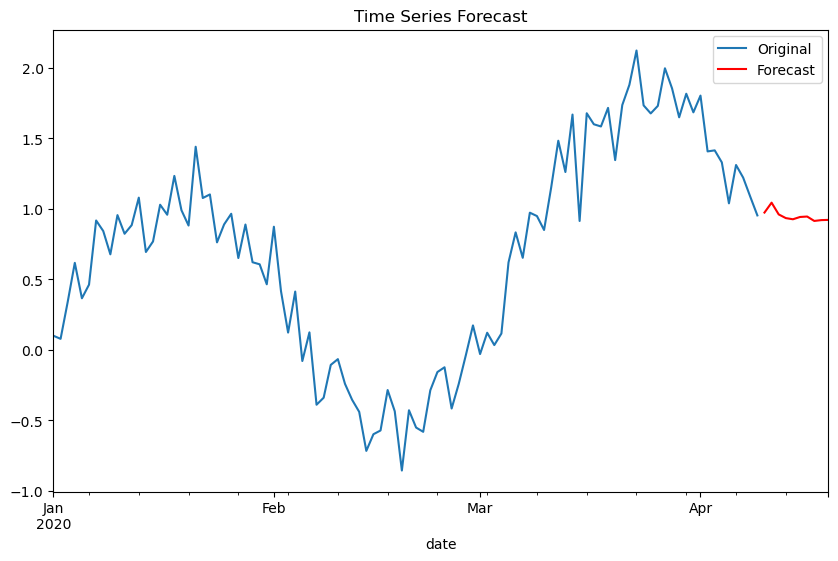

In [7]:
# Plot the original time series
df['value'].plot(label='Original', figsize=(10, 6))

# Plot the forecasted values
forecast.plot(label='Forecast', color='red')

plt.legend()
plt.title('Time Series Forecast')
plt.show()
